## Exploratory Data Analysis on Credit Card Fraud Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

/home/tvnl/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
sys.path.append(os.path.abspath('../src'))

from data_loader import load_data

DATA_PATH = '../data/creditcard.csv' 
df = load_data(DATA_PATH)
df.head()

Data loaded successfully with shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
pd.options.display.max_columns = 40
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
any(df.isnull().sum() > 0)

False

In [12]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

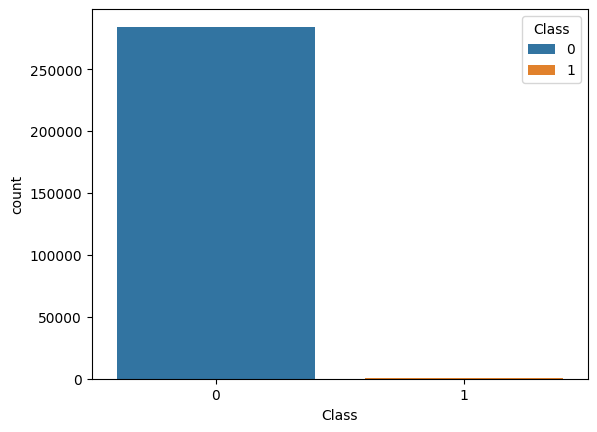

In [13]:
sns.countplot(x = 'Class', data = df, hue='Class')
plt.show()

In [19]:
fraud_percentage = round(df['Class'].value_counts(normalize=True) * 100, 2)
print(fraud_percentage)

Class
0    99.83
1     0.17
Name: proportion, dtype: float64


From the above observations, we can see that the dataset is highly imbalance, the fraud transactions (Class 1) are very few in the dataset. This can be handled by:

1. Using oversampling techniques like SMOTE
2. Removing outliers by using box plots
3. Choosing the right approximator like IsolationForest which performs well on imbalanced datasets

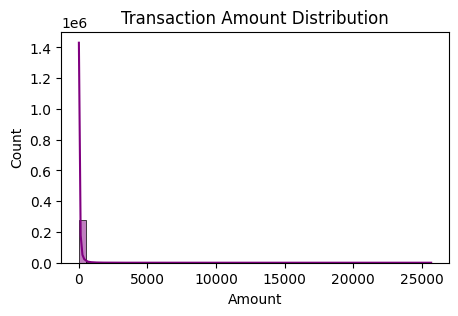

In [22]:
# Let's visualize the distribution of amount
plt.figure(figsize=(5, 3))
sns.histplot(df['Amount'], bins=50, kde=True, color='purple')
plt.title('Transaction Amount Distribution')
plt.show()


In [23]:
df_0 = df[df.Class == 0]
df_1 = df[df.Class == 1]

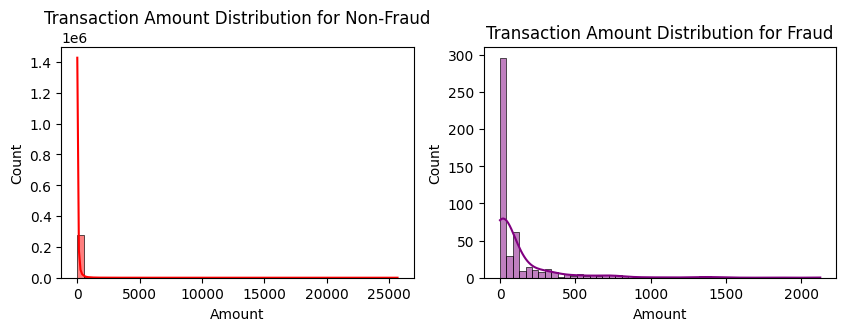

In [28]:
# Let's visualize the distribution of amount in case of fraud vs. non-fraud

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(df_0['Amount'], bins=50, kde=True, color='red', ax=ax[0])
ax[0].set_title('Transaction Amount Distribution for Non-Fraud')

sns.histplot(df_1['Amount'], bins=50, kde=True, color='purple', ax=ax[1])
ax[1].set_title('Transaction Amount Distribution for Fraud')

plt.show()

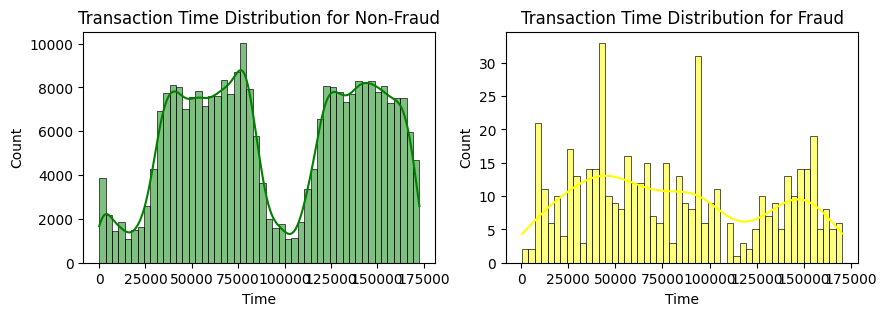

In [29]:
# Let's visualize the distribution of time in case of fraud vs. non-fraud

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.histplot(df_0['Time'], bins=50, kde=True, color='green', ax=ax[0])
ax[0].set_title('Transaction Time Distribution for Non-Fraud')

sns.histplot(df_1['Time'], bins=50, kde=True, color='yellow', ax=ax[1])
ax[1].set_title('Transaction Time Distribution for Fraud')

plt.show()

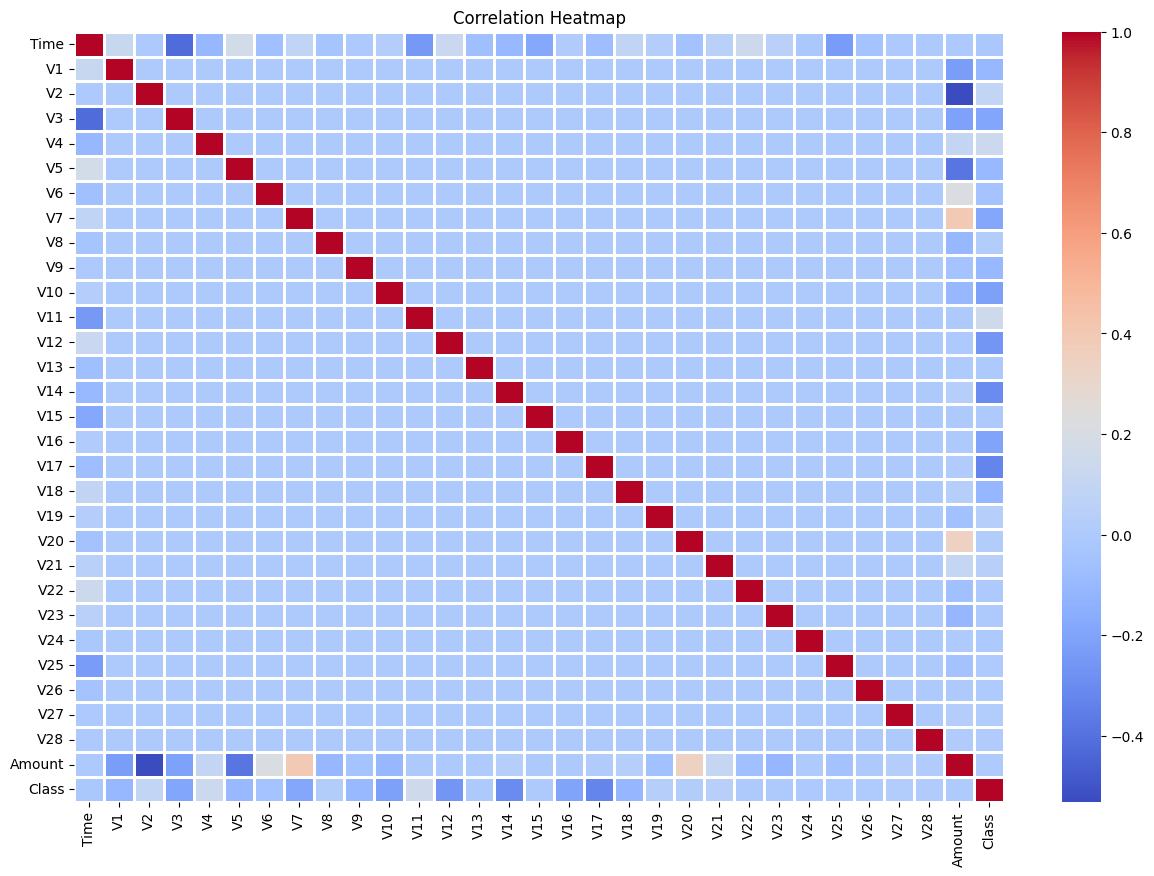

In [30]:
# Corelation matrix

plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=2)
plt.title('Correlation Heatmap')
plt.show()


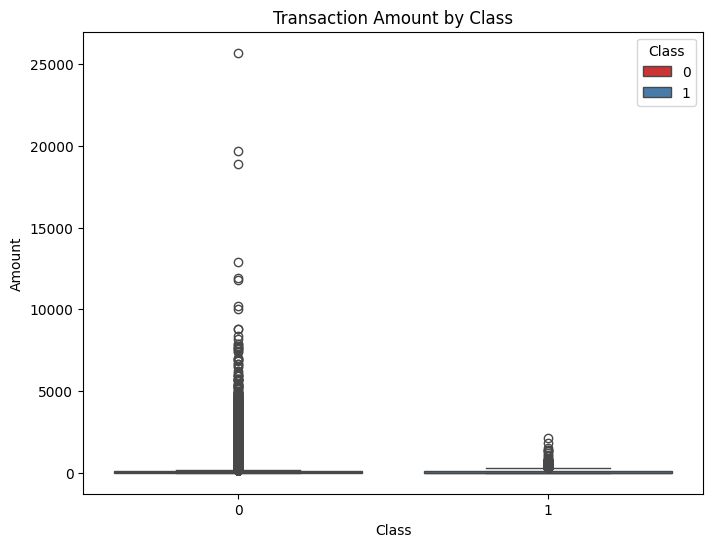

In [33]:
# Box Plot for outlier detection

plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df,hue='Class', palette='Set1')
plt.title('Transaction Amount by Class')
plt.show()


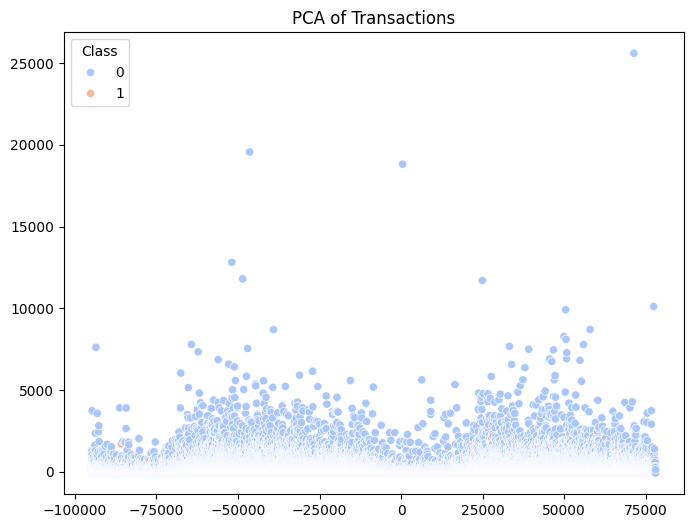

In [34]:
# Performing PCA for dimensionality reduction

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df.drop('Class', axis=1))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=df['Class'], palette='coolwarm')
plt.title('PCA of Transactions')
plt.show()

In [36]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

In [37]:
# Removing outliers

# Using z score

from scipy import stats
df_no_outliers_z_score = df[(np.abs(stats.zscore(df[['scaled_amount', 'scaled_time']])) < 3).all(axis=1)]


In [38]:
df_no_outliers_z_score.shape

(280731, 31)

In [39]:
# IQR Method for Outlier Removal
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Remove outliers from Amount and Time
df_cleaned = remove_outliers(df_no_outliers_z_score, 'scaled_amount')
df_cleaned = remove_outliers(df_cleaned, 'scaled_time')

# We can see that V3, V12, V14, V18 are correlated with the class, we can remove outliers
corr_features = ['V3', 'V12', 'V14', 'V18']
for feature in corr_features:
    df_cleaned = remove_outliers(df_cleaned, feature)

In [40]:
df_cleaned.shape

(218564, 31)

In [42]:
# Using Isolation Forest for Anomaly detection
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
outliers = iso.fit_predict(df_cleaned[['scaled_amount', 'scaled_time']])

df_filtered = df_cleaned[outliers == 1]

In [43]:
df_filtered.shape

(216378, 31)